In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### load data
time_series_data = pd.read_csv('/Users/eupirate/Desktop/CCT/CA2 ML 六月/IT_Company_Time_Series.csv')
time_series_data.head()

,Date,Software_1,Software_2,Software_3,Software_4,Software_5,Software_6,Software_7,Software_8,Software_9,Software_10,Software_11,Software_12,Software_13,Software_14,Software_15
0,2018-01-31,104,97,63,72,50,95,101,63,134,101,72,134,118,95,114
1,2018-02-28,89,128,61,95,52,97,113,73,144,117,68,110,115,79,131
2,2018-03-31,114,101,75,85,45,96,120,75,142,109,69,110,117,74,84
3,2018-04-30,107,94,44,85,35,99,112,75,135,98,59,137,101,72,98
4,2018-05-31,92,104,66,97,48,81,108,81,138,89,64,124,107,83,122


In [3]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         60 non-null     object
 1   Software_1   60 non-null     int64 
 2   Software_2   60 non-null     int64 
 3   Software_3   60 non-null     int64 
 4   Software_4   60 non-null     int64 
 5   Software_5   60 non-null     int64 
 6   Software_6   60 non-null     int64 
 7   Software_7   60 non-null     int64 
 8   Software_8   60 non-null     int64 
 9   Software_9   60 non-null     int64 
 10  Software_10  60 non-null     int64 
 11  Software_11  60 non-null     int64 
 12  Software_12  60 non-null     int64 
 13  Software_13  60 non-null     int64 
 14  Software_14  60 non-null     int64 
 15  Software_15  60 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 7.6+ KB


In [4]:
### This dataset provide us with a collection of time captureed the monthly demand for 15 different software products offered by this IT company. Each row in the dataset corresponds to a specific month and year, recording the number of units demanded for each product during that period. 

### We observed the Date coumn contains the date of each observation in the YYY-MM-DD format. There are Software_1 to Software_15 columns represent tthe demand for 15 unique software products. THe values are integer counts of the units demanded each month.

In [5]:
### We continue to explore the dataset

In [6]:
### check for missing values
missing_values = time_series_data.isnull().sum()
data_types = time_series_data.dtypes

missing_values, data_types

(Date           0
 Software_1     0
 Software_2     0
 Software_3     0
 Software_4     0
 Software_5     0
 Software_6     0
 Software_7     0
 Software_8     0
 Software_9     0
 Software_10    0
 Software_11    0
 Software_12    0
 Software_13    0
 Software_14    0
 Software_15    0
 dtype: int64,
 Date           object
 Software_1      int64
 Software_2      int64
 Software_3      int64
 Software_4      int64
 Software_5      int64
 Software_6      int64
 Software_7      int64
 Software_8      int64
 Software_9      int64
 Software_10     int64
 Software_11     int64
 Software_12     int64
 Software_13     int64
 Software_14     int64
 Software_15     int64
 dtype: object)

In [7]:
### The dataset contains no missing alues, and Date is object type, we could convert next to a datetime format. Then We can plot the time series for each of the software product to idenify trends and seasonality.

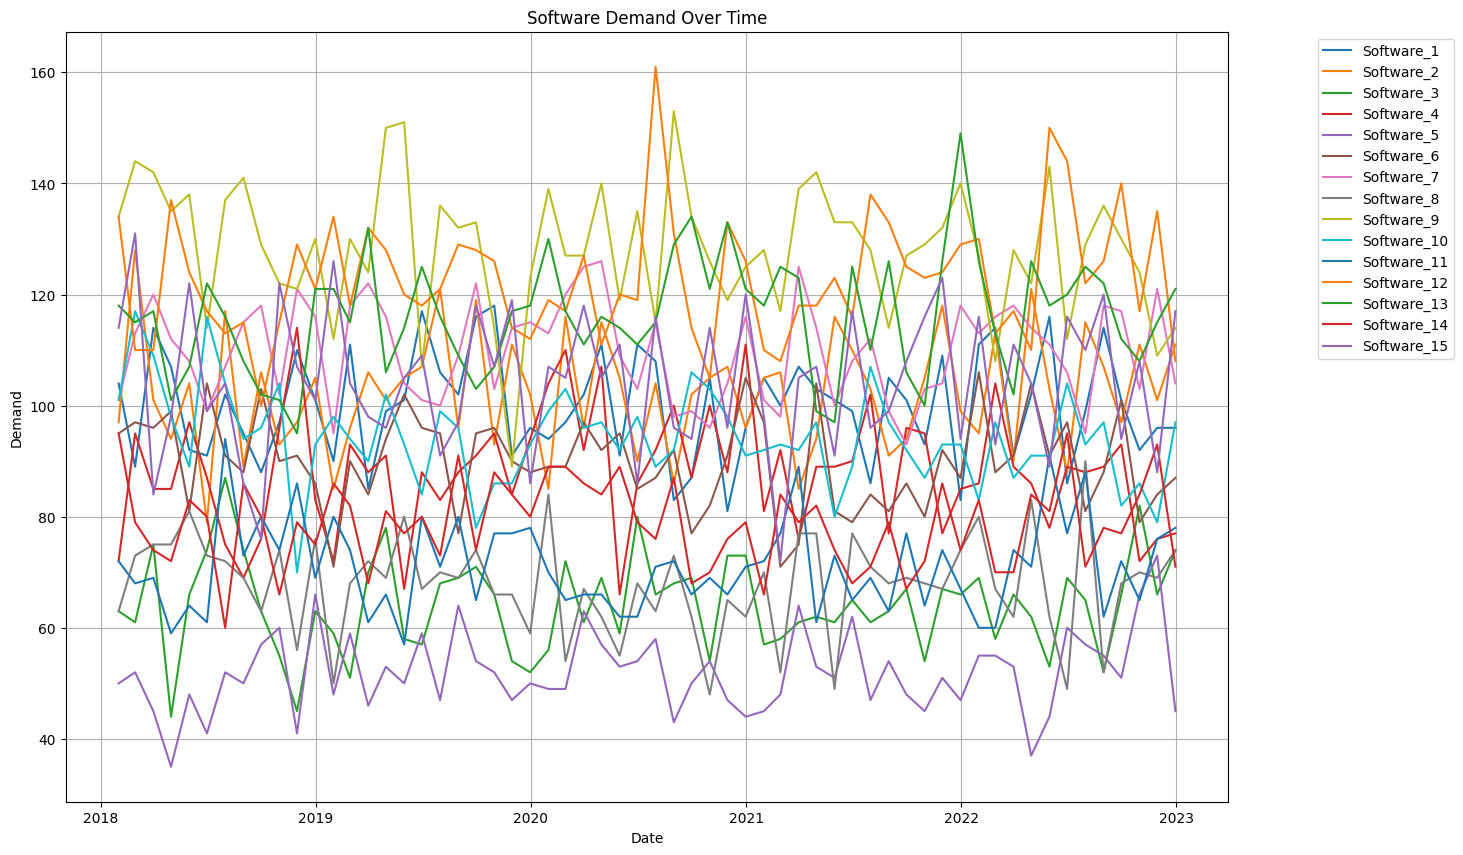

In [8]:
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])

# Set the Date column as the index
time_series_data.set_index('Date', inplace=True)

# Plot time series data for each software product
plt.figure(figsize=(15, 10))

for column in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[column], label=column)

plt.title('Software Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


In [9]:
### This visualization indicated among the 15 unique software products over time the demand has been ups and downs trends over time. There appear to be a seaonal patters in the demand for serveral software products. Next, we'll take an in-depth view of each of software product's demand and oberser if there are any outliers.

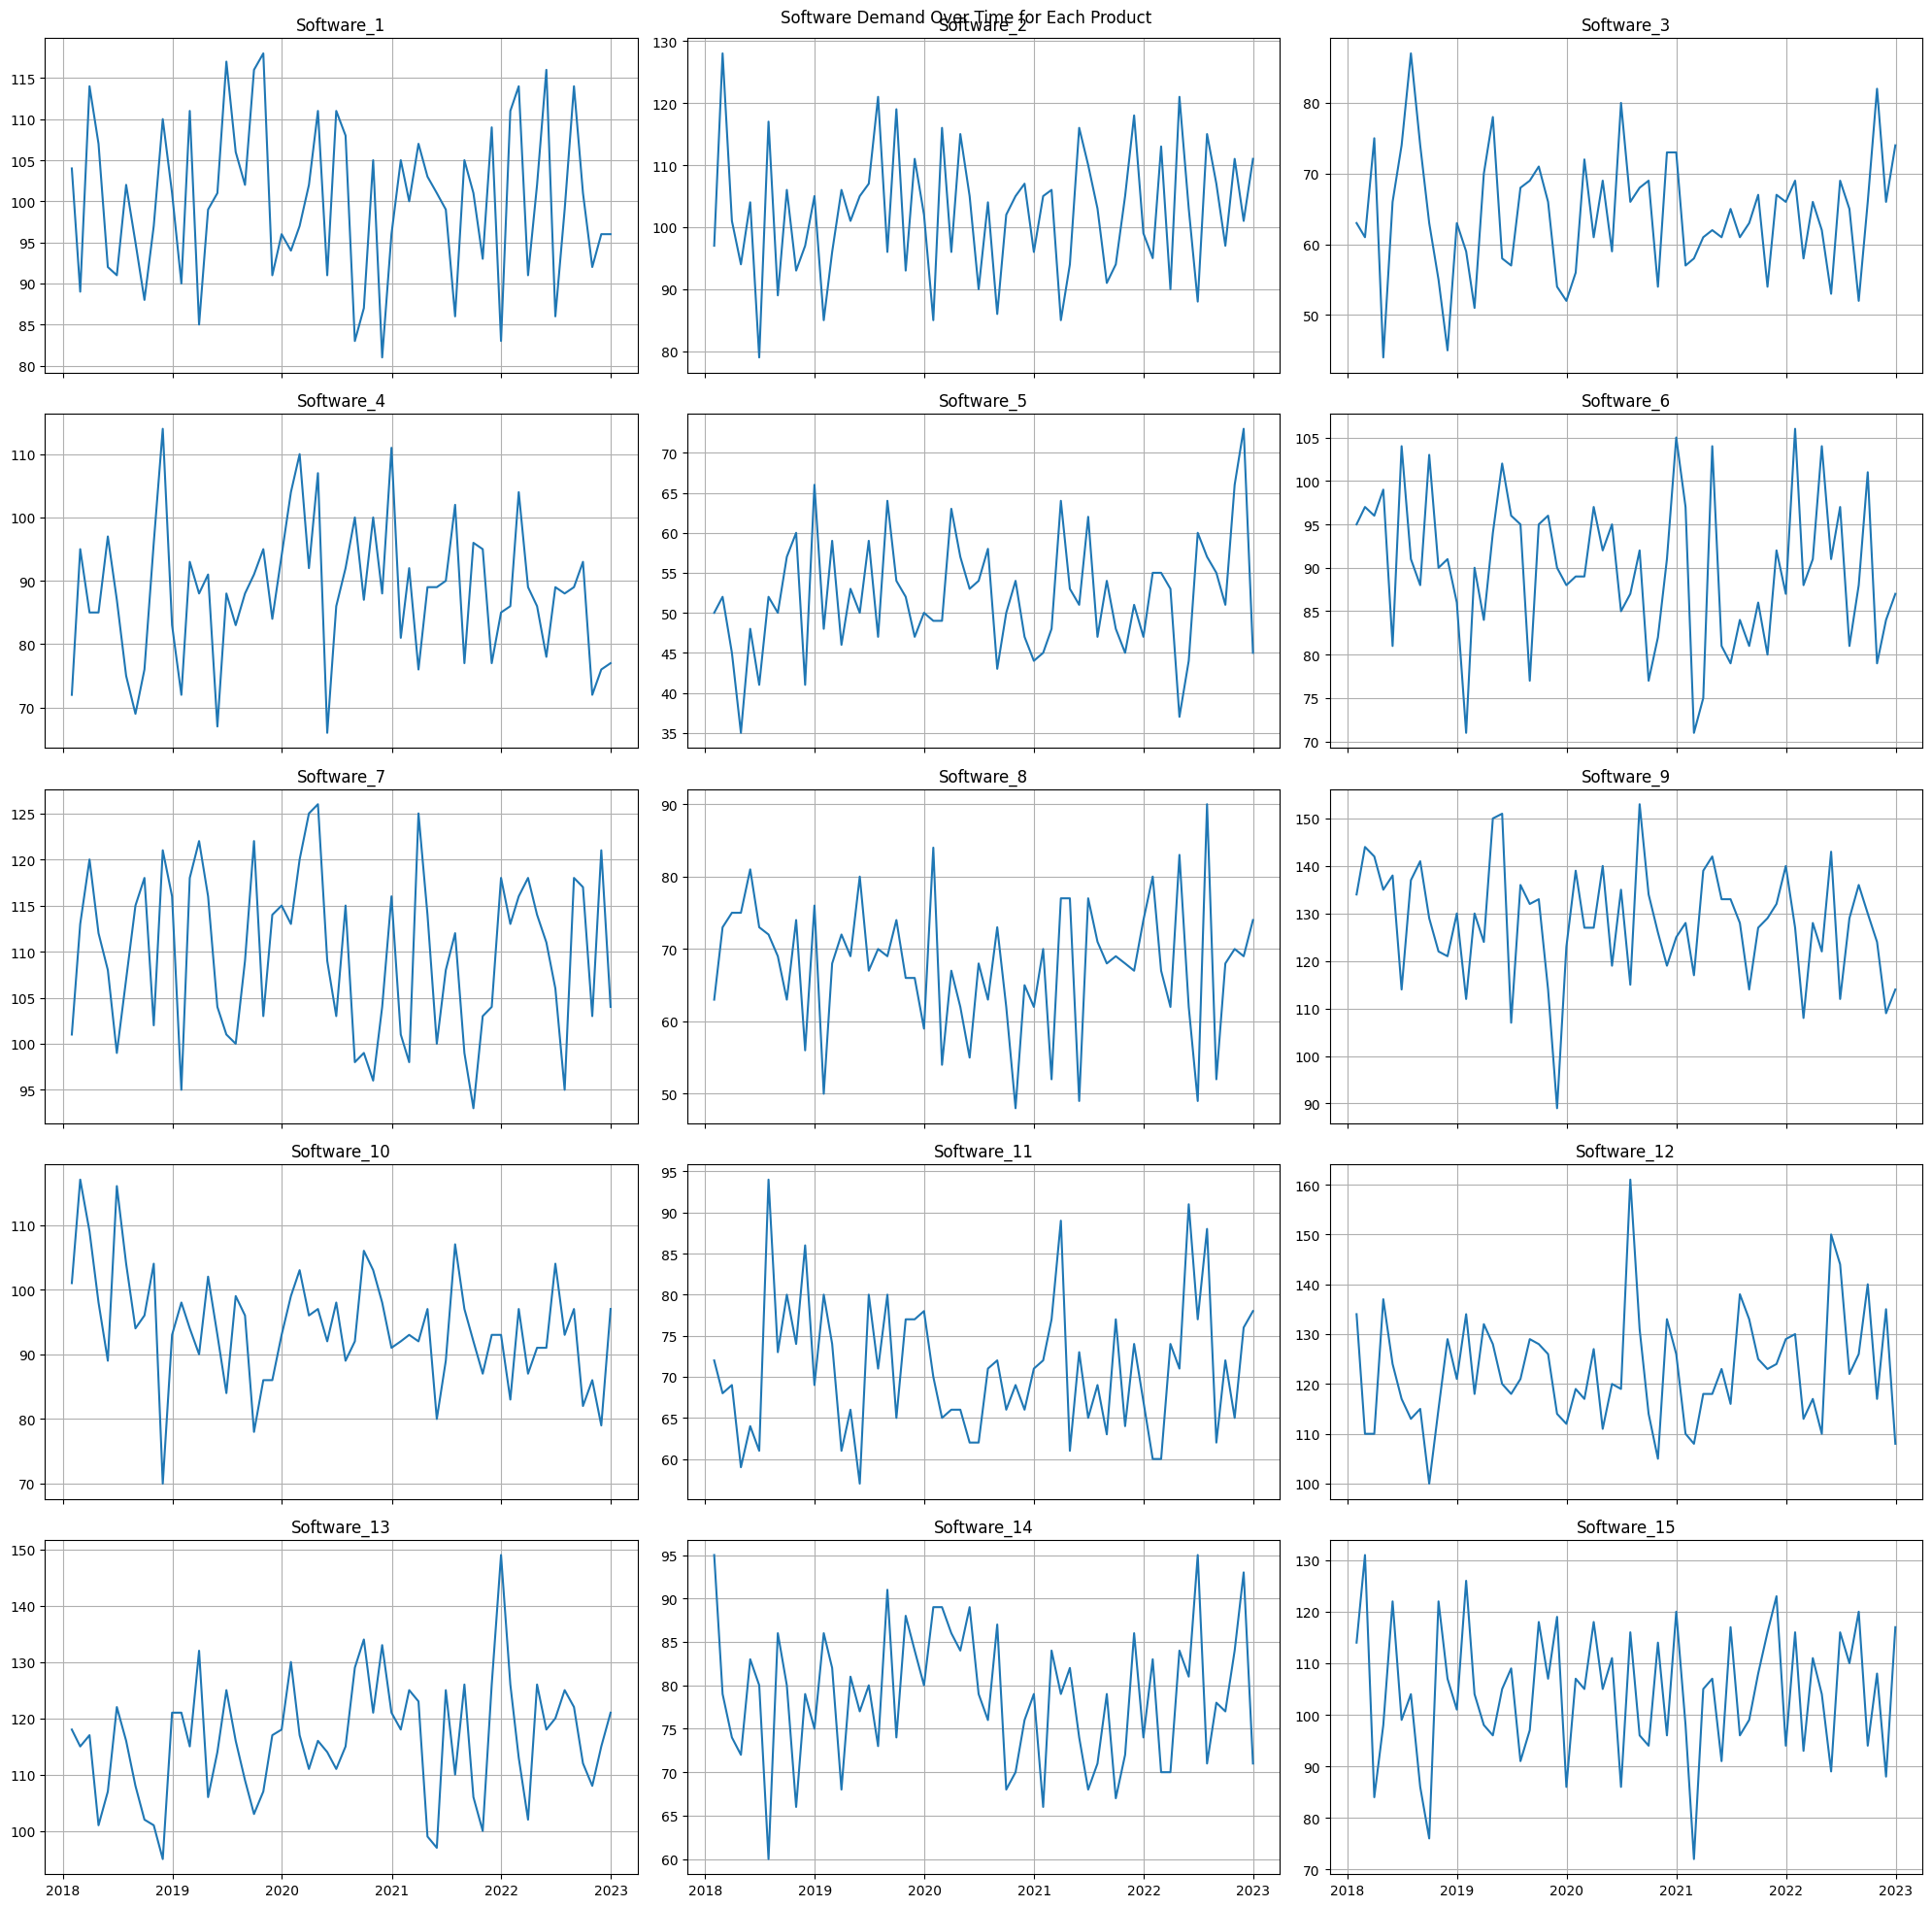

In [10]:
# Plot time series data for each software product in separate subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20), sharex=True)

for i, column in enumerate(time_series_data.columns):
    ax = axes[i//3, i%3]
    ax.plot(time_series_data.index, time_series_data[column], label=column)
    ax.set_title(column)
    ax.grid(True)

fig.suptitle('Software Demand Over Time for Each Product')
plt.tight_layout()
plt.show()


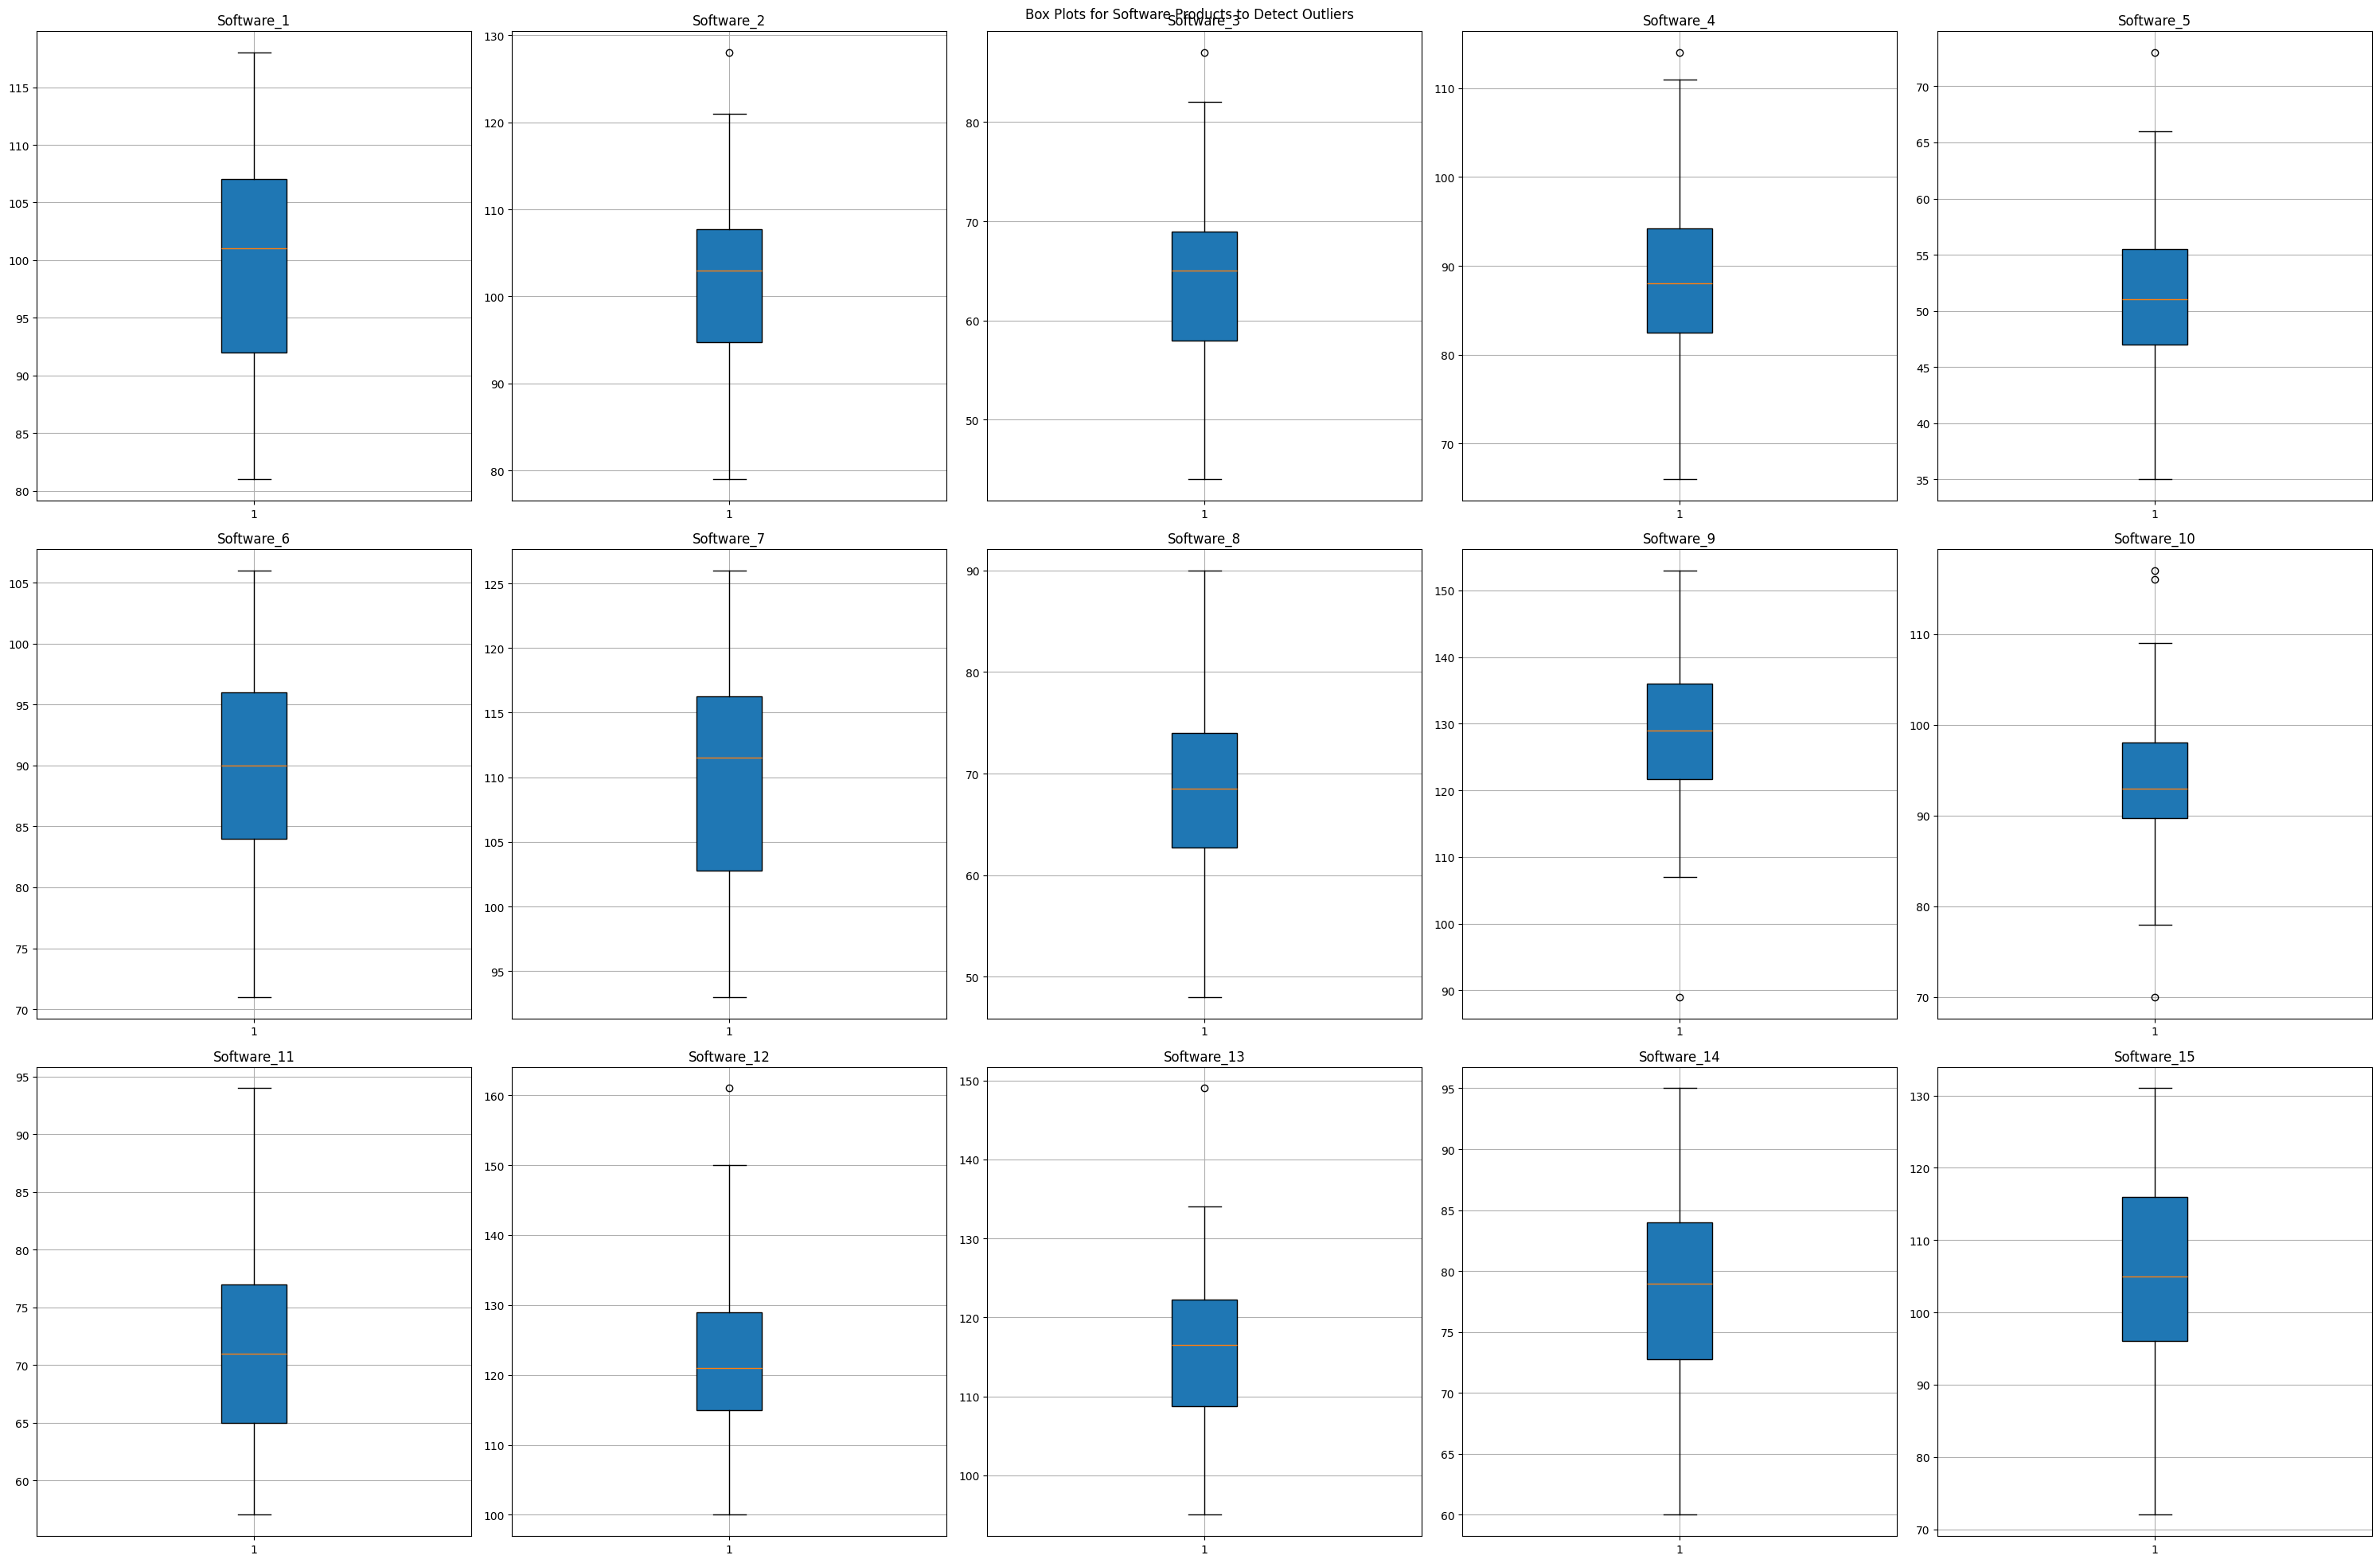

In [11]:
# Create a 3x5 box plot layout for all the software products to detect outliers
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 20))

# Iterate over all the software products to create individual box plots
for i, column in enumerate(time_series_data.columns):
    ax = axes[i//5, i%5]
    ax.boxplot(time_series_data[column], patch_artist=True)
    ax.set_title(column)
    ax.grid(True)

fig.suptitle('Box Plots for Software Products to Detect Outliers')
plt.tight_layout()
plt.show()


In [12]:
### By separating individual software products, we can observe the outliers indicated outside of the whiskers: Software_2, Software_3, Software_4, Software_5, Software_9, Software_10, Software_12, Software_13. This info may need further investigation as we go.

Outliers in Software_2:
Date
2018-02-28    128
Name: Software_2, dtype: int64


Outliers in Software_3:
Date
2018-07-31    87
Name: Software_3, dtype: int64


Outliers in Software_4:
Date
2018-11-30    114
Name: Software_4, dtype: int64


Outliers in Software_5:
Date
2022-11-30    73
Name: Software_5, dtype: int64


Outliers in Software_9:
Date
2019-11-30    89
Name: Software_9, dtype: int64


Outliers in Software_10:
Date
2018-02-28    117
2018-06-30    116
2018-11-30     70
Name: Software_10, dtype: int64


Outliers in Software_12:
Date
2020-07-31    161
Name: Software_12, dtype: int64


Outliers in Software_13:
Date
2021-12-31    149
Name: Software_13, dtype: int64


       Software_2  Software_3  Software_4  Software_5  Software_9  \
count   60.000000   60.000000   60.000000   60.000000   60.000000   
mean   101.866667   63.750000   87.683333   51.516667  128.850000   
std      9.997401    8.033036   10.213802    6.763541   10.824995   
min     79.000000   44.000000   66.000000   3

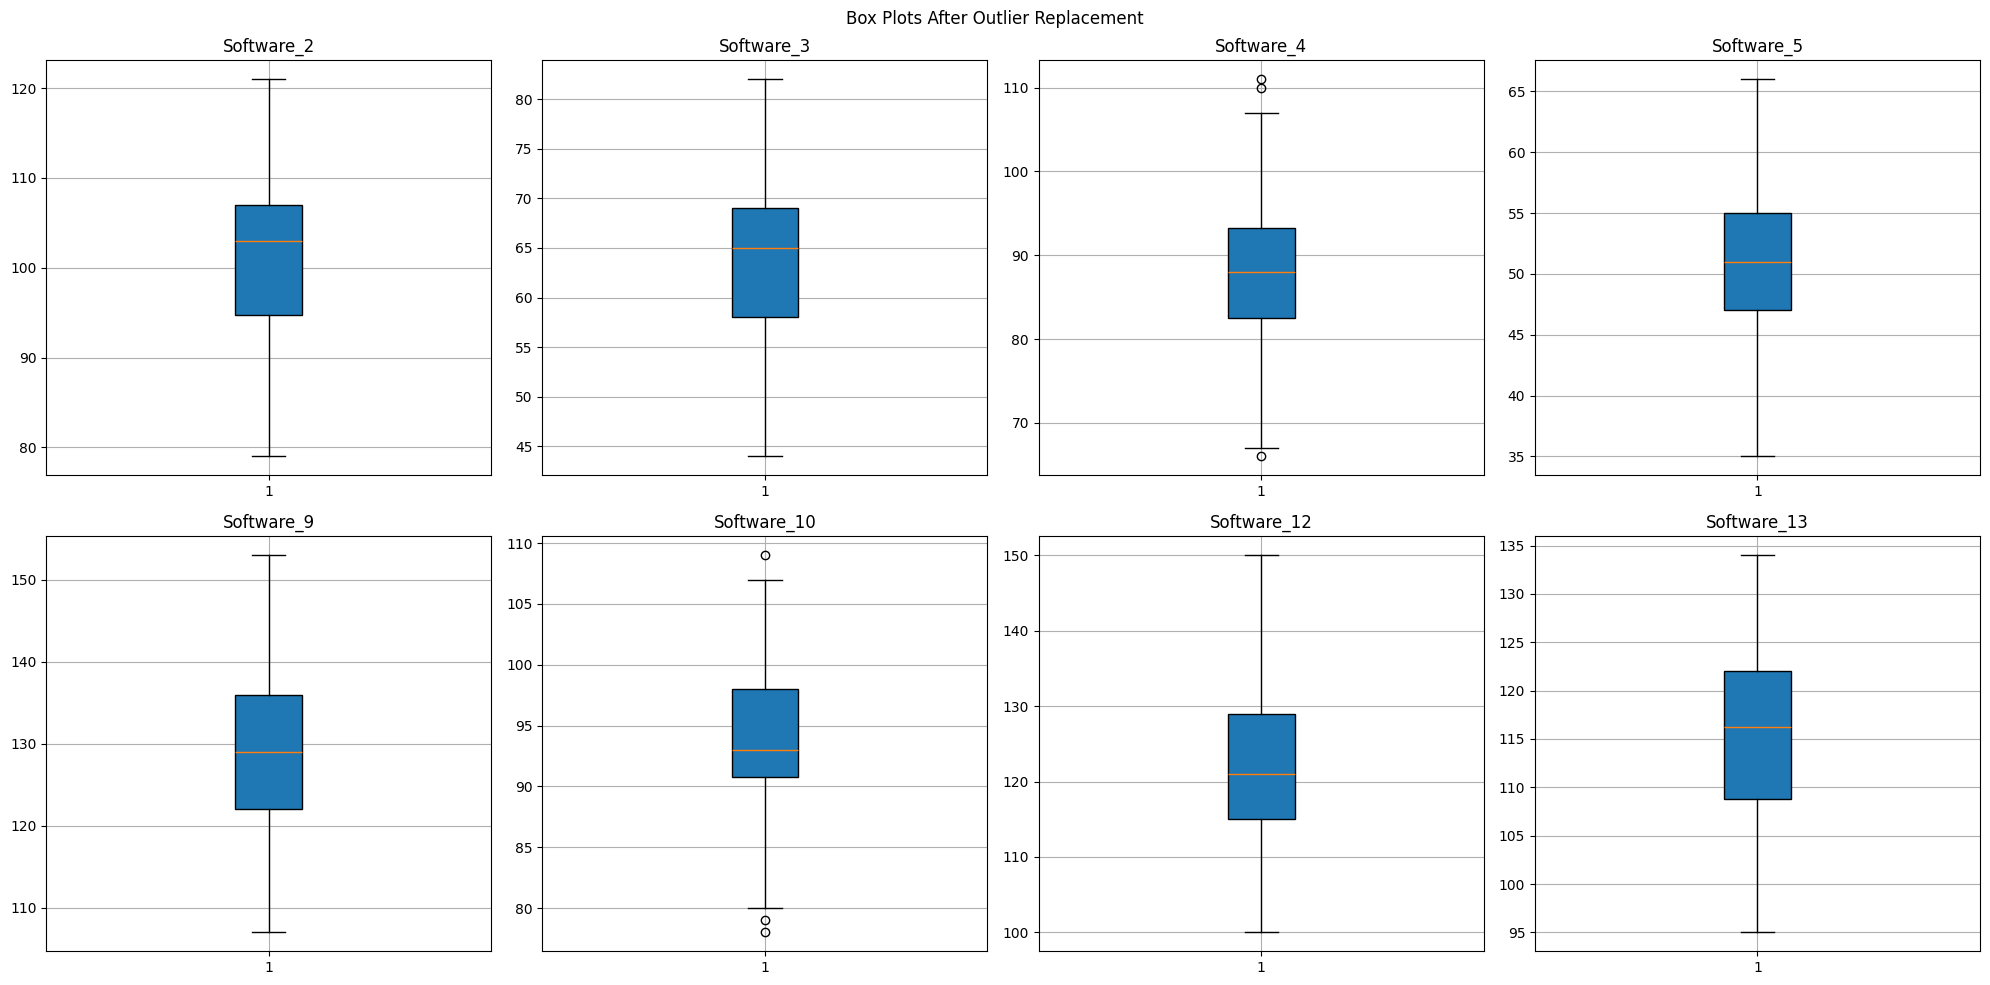

In [13]:
# Function to detect outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Identify outliers for the selected software products
outliers = {}
for column in ['Software_2', 'Software_3', 'Software_4', 'Software_5', 'Software_9', 'Software_10', 'Software_12', 'Software_13']:
    outliers[column] = detect_outliers(time_series_data[column])

# Display the outliers
for column, data in outliers.items():
    print(f"Outliers in {column}:")
    print(data)
    print("\n")

# Replace outliers with the median values of the respective columns
for column in outliers.keys():
    median_value = time_series_data[column].median()
    time_series_data[column] = time_series_data[column].apply(
        lambda x: median_value if x in outliers[column].values else x
    )

# Verify if the outliers have been replaced
time_series_data[['Software_2', 'Software_3', 'Software_4', 'Software_5', 'Software_9', 'Software_10', 'Software_12', 'Software_13']].describe()


# Calculate the summary statistics
summary_stats = time_series_data[['Software_2', 'Software_3', 'Software_4', 'Software_5', 'Software_9', 'Software_10', 'Software_12', 'Software_13']].describe()

# Display the summary statistics
print(summary_stats)



## verify with box plots for the selected software products after outlier replacement
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, column in enumerate(['Software_2', 'Software_3', 'Software_4', 'Software_5', 'Software_9', 'Software_10', 'Software_12', 'Software_13']):
    ax = axes[i//4, i%4]
    ax.boxplot(time_series_data[column], patch_artist=True)
    ax.set_title(column)
    ax.grid(True)

fig.suptitle('Box Plots After Outlier Replacement')
plt.tight_layout()
plt.show()